<h2>Importing all of the necessary libraries</h2>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.pyplot import figure
from datetime import datetime
import matplotlib.patches as mpatches
from sklearn.linear_model import LinearRegression

#load data
vd = pd.read_csv('owid-covid-data(1).csv')
#vd.iloc[[:,2]].values
fd = vd[['continent','location', 'date', 'total_cases', 'total_vaccinations', 'total_deaths', 'new_cases']]
fd

,continent,location,date,total_cases,total_vaccinations,total_deaths,new_cases
0,Asia,Afghanistan,2020-02-24,1.0,NaN,NaN,1.0
1,Asia,Afghanistan,2020-02-25,1.0,NaN,NaN,0.0
2,Asia,Afghanistan,2020-02-26,1.0,NaN,NaN,0.0
3,Asia,Afghanistan,2020-02-27,1.0,NaN,NaN,0.0
4,Asia,Afghanistan,2020-02-28,1.0,NaN,NaN,0.0
...,...,...,...,...,...,...,...
102470,Africa,Zimbabwe,2021-07-10,66853.0,NaN,2126.0,1787.0
102471,Africa,Zimbabwe,2021-07-11,67765.0,1491397.0,2185.0,912.0
102472,Africa,Zimbabwe,2021-07-12,70426.0,1531868.0,2236.0,2661.0
102473,Africa,Zimbabwe,2021-07-13,73271.0,1575539.0,2274.0,2845.0


</br>

<h3>Displaying the Data and Initializing Variables</h3>

In [2]:
fd.describe()

,total_cases,total_vaccinations,total_deaths,new_cases
count,9.859400e+04,1.806200e+04,8.837100e+04,98591.000000
mean,1.113275e+06,3.617089e+07,2.983510e+04,6057.652047
std,7.595407e+06,1.959520e+08,1.780901e+05,37718.695017
min,1.000000e+00,0.000000e+00,1.000000e+00,-74347.000000
25%,1.351000e+03,1.359290e+05,5.600000e+01,2.000000
50%,1.423400e+04,1.031711e+06,4.190000e+02,75.000000
75%,1.523662e+05,6.409168e+06,4.028500e+03,823.000000
max,1.883559e+08,3.541237e+09,4.058112e+06,906017.000000


In [3]:
fd.head()

,continent,location,date,total_cases,total_vaccinations,total_deaths,new_cases
0,Asia,Afghanistan,2020-02-24,1.0,NaN,NaN,1.0
1,Asia,Afghanistan,2020-02-25,1.0,NaN,NaN,0.0
2,Asia,Afghanistan,2020-02-26,1.0,NaN,NaN,0.0
3,Asia,Afghanistan,2020-02-27,1.0,NaN,NaN,0.0
4,Asia,Afghanistan,2020-02-28,1.0,NaN,NaN,0.0


In [4]:
fd.tail()

,continent,location,date,total_cases,total_vaccinations,total_deaths,new_cases
102470,Africa,Zimbabwe,2021-07-10,66853.0,NaN,2126.0,1787.0
102471,Africa,Zimbabwe,2021-07-11,67765.0,1491397.0,2185.0,912.0
102472,Africa,Zimbabwe,2021-07-12,70426.0,1531868.0,2236.0,2661.0
102473,Africa,Zimbabwe,2021-07-13,73271.0,1575539.0,2274.0,2845.0
102474,Africa,Zimbabwe,2021-07-14,76381.0,NaN,2332.0,3110.0


</br>

<h2>Filtering Data for Our Purposes</h2> 
In this section we will be comparing Canada to Israel. Since, Israel and Canada had different approaches in vaccine distributions. 

In [5]:
# filtering data based on specific location - Canada
canada_data = fd.loc[fd['location']=='Canada']
canada_data.head(10)

,continent,location,date,total_cases,total_vaccinations,total_deaths,new_cases
16557,North America,Canada,2020-01-26,1.0,NaN,NaN,1.0
16558,North America,Canada,2020-01-27,1.0,NaN,NaN,0.0
16559,North America,Canada,2020-01-28,2.0,NaN,NaN,1.0
16560,North America,Canada,2020-01-29,2.0,NaN,NaN,0.0
16561,North America,Canada,2020-01-30,2.0,NaN,NaN,0.0
16562,North America,Canada,2020-01-31,4.0,NaN,NaN,2.0
16563,North America,Canada,2020-02-01,4.0,NaN,NaN,0.0
16564,North America,Canada,2020-02-02,4.0,NaN,NaN,0.0
16565,North America,Canada,2020-02-03,4.0,NaN,NaN,0.0
16566,North America,Canada,2020-02-04,4.0,NaN,NaN,0.0


In [6]:
# filtering data based on specific location - Israel
israel_data = fd.loc[fd['location'] == 'Israel']
israel_data.head(10)

,continent,location,date,total_cases,total_vaccinations,total_deaths,new_cases
45641,Asia,Israel,2020-02-20,NaN,NaN,NaN,NaN
45642,Asia,Israel,2020-02-21,1.0,NaN,NaN,1.0
45643,Asia,Israel,2020-02-22,1.0,NaN,NaN,0.0
45644,Asia,Israel,2020-02-23,1.0,NaN,NaN,0.0
45645,Asia,Israel,2020-02-24,1.0,NaN,NaN,0.0
45646,Asia,Israel,2020-02-25,1.0,NaN,NaN,0.0
45647,Asia,Israel,2020-02-26,2.0,NaN,NaN,1.0
45648,Asia,Israel,2020-02-27,3.0,NaN,NaN,1.0
45649,Asia,Israel,2020-02-28,6.0,NaN,NaN,3.0
45650,Asia,Israel,2020-02-29,6.0,NaN,NaN,0.0


<h3>Visualizing Israel Data</h3>
<p> First graph shows correlation between date and total_cases.</br>
Second graph shows correlation between date and total_vaccinations</p>

In [7]:
israel_data[["year","month", "day"]] = israel_data["date"].str.split("-", expand = True)

C:\Users\etufa\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [8]:
isr = israel_data.groupby([(israel_data["year"]),(israel_data["month"])]).mean()
isr_2020 = isr.loc[isr.index.get_level_values(0) == '2020']
isr_2021 = isr.loc[isr.index.get_level_values(0) == '2021']

In [9]:
isr.describe()

,total_cases,total_vaccinations,total_deaths,new_cases
count,18.000000,8.000000e+00,17.000000,18.000000
mean,377608.870245,7.676454e+06,3060.374853,1570.703072
std,352383.758785,4.067192e+06,2610.520239,2007.576317
min,2.444444,3.398772e+05,8.500000,0.666667
25%,26840.400000,5.643520e+06,422.387097,180.456452
50%,310599.703226,9.819312e+06,2744.666667,614.450000
75%,793548.661866,1.055949e+07,6019.838710,2081.548387
max,844739.571429,1.087754e+07,6432.857143,7102.354839


In [10]:
isr_2020

total_cases  total_vaccinations  total_deaths    new_cases
year month                                                              
2020 02          2.444444                 NaN           NaN     0.666667
     03       1138.290323                 NaN      8.500000   184.225806
     04      12243.733333                 NaN    136.000000   339.300000
     05      16517.290323                 NaN    266.064516    38.161290
     06      20082.866667                 NaN    306.566667   278.633333
     07      47113.000000                 NaN    422.387097  1493.419355
     08      94085.516129                 NaN    759.193548  1457.161290
     09     174054.000000                 NaN   1234.400000  4350.166667
     10     296018.806452                 NaN   2149.483871  2159.290323
     11     325180.600000                 NaN   2744.666667   761.400000
     12     370162.193548       339877.153846   3057.709677  2776.483871

In [11]:
isr_2021

total_cases  total_vaccinations  total_deaths    new_cases
year month                                                              
2021 01     539658.774194        2.781217e+06   4007.387097  7102.354839
     02     723410.357143        6.597621e+06   5359.214286  4727.571429
     03     816928.096774        9.347150e+06   6019.838710  1848.322581
     04     836509.133333        1.029147e+07   6309.433333   179.200000
     05     839099.290323        1.053061e+07   6387.903226    32.064516
     06     840015.700000        1.064614e+07   6424.766667    76.733333
     07     844739.571429        1.087754e+07   6432.857143   467.500000

array([<AxesSubplot:xlabel='year,month'>,
       <AxesSubplot:xlabel='year,month'>,
       <AxesSubplot:xlabel='year,month'>,
       <AxesSubplot:xlabel='year,month'>], dtype=object)

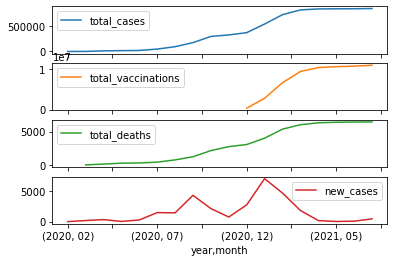

In [12]:
isr.plot(subplots=True)

<AxesSubplot:xlabel='year,month'>

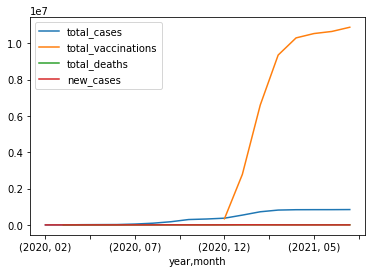

In [13]:
isr.plot()

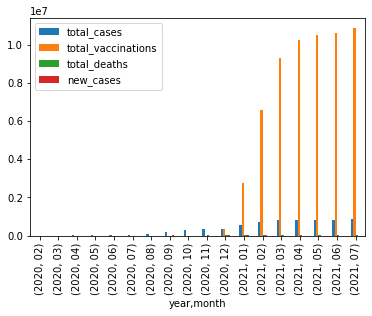

In [14]:
isr.plot(kind="bar")

plt.show()

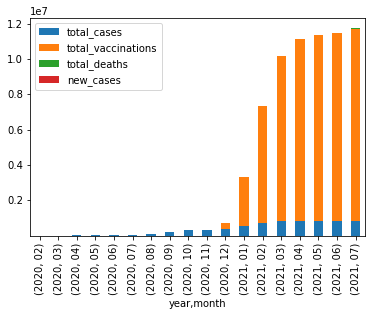

In [15]:
isr.plot(kind='bar', stacked=True)
plt.show()

<h3>Visualizing Canada Data</h3>
<p> First graph shows correlation between date and total_cases.</br>
Second graph shows correlation between date and total_vaccinations</p>

In [16]:
canada_data[["year","month", "day"]] = canada_data["date"].str.split("-", expand = True)

C:\Users\etufa\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [17]:
can = canada_data.groupby([(canada_data["year"]),(canada_data["month"])]).mean()
can_2020 = can.loc[can.index.get_level_values(0) == '2020']
can_2021 = can.loc[can.index.get_level_values(0) == '2021']

In [18]:
can.describe()

,total_cases,total_vaccinations,total_deaths,new_cases
count,1.900000e+01,8.000000e+00,17.000000,19.000000
mean,4.896361e+05,1.306827e+07,14200.534023,2484.741800
std,5.231027e+05,1.546348e+07,8567.094930,2558.213580
min,2.000000e+00,3.513589e+04,33.782609,0.551724
25%,8.849517e+04,1.129036e+06,8914.258065,430.789247
50%,1.976199e+05,6.443614e+06,11174.633333,1226.516129
75%,8.781005e+05,2.145739e+07,22504.419355,4293.002151
max,1.426312e+06,4.092123e+07,26359.500000,7985.300000


In [19]:
can_2020

total_cases  total_vaccinations  total_deaths    new_cases
year month                                                              
2020 01          2.000000                 NaN           NaN     0.666667
     02          8.068966                 NaN           NaN     0.551724
     03       1677.903226                 NaN     33.782609   274.419355
     04      30996.266667                 NaN   1805.100000  1531.000000
     05      76442.580645                 NaN   6408.129032  1226.516129
     06     100547.766667                 NaN   8470.066667   453.933333
     07     111618.870968                 NaN   8914.258065   393.032258
     08     124324.225806                 NaN   9108.387097   407.645161
     09     143029.666667                 NaN   9269.466667  1006.300000
     10     197619.870968                 NaN   9840.032258  2458.258065
     11     304710.966667                 NaN  11174.633333  4808.133333
     12     484882.903226        35135.888889  13948.000000  6543.612903

In [20]:
can_2021

total_cases  total_vaccinations  total_deaths    new_cases
year month                                                             
2021 01     6.988199e+05        5.357055e+05  17959.290323  6428.580645
     02     8.314529e+05        1.326813e+06  21227.178571  3142.821429
     03     9.247482e+05        3.481866e+06  22504.419355  3777.870968
     04     1.108077e+06        9.405362e+06  23533.733333  7985.300000
     05     1.327417e+06        1.849478e+07  24905.967742  5192.290323
     06     1.410397e+06        3.034524e+07  25947.133333  1116.733333
     07     1.426312e+06        4.092123e+07  26359.500000   462.428571

array([<AxesSubplot:xlabel='year,month'>,
       <AxesSubplot:xlabel='year,month'>,
       <AxesSubplot:xlabel='year,month'>,
       <AxesSubplot:xlabel='year,month'>], dtype=object)

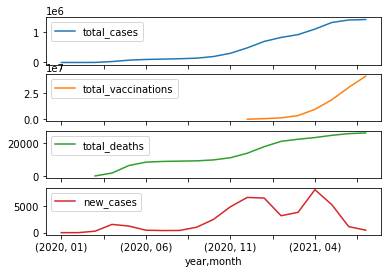

In [21]:
can.plot(subplots=True)

<AxesSubplot:xlabel='year,month'>

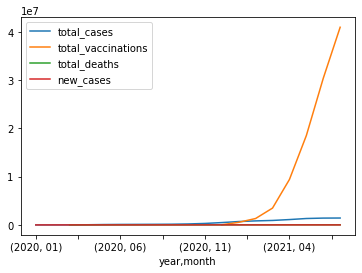

In [22]:
can.plot()

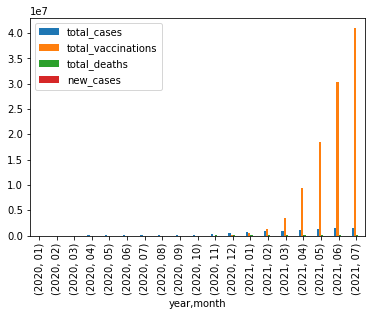

In [23]:
can.plot(kind="bar")
plt.show()

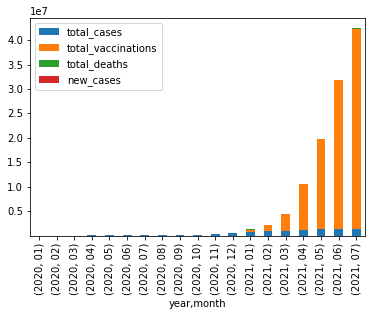

In [24]:
can.plot(kind='bar', stacked=True)
plt.show()

<h2>Visualizing a correlation between Israel and Canada 2020</h2>

Visualizing the correlation between Israel and Canada in terms of Cases

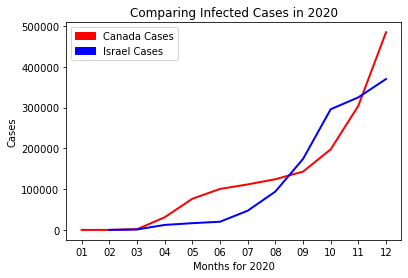

In [25]:
plt.plot(can_2020.index.get_level_values(1).tolist(), can_2020["total_cases"], color='red', linewidth=2)
plt.plot(isr_2020.index.get_level_values(1).tolist(), isr_2020["total_cases"], color='blue', linewidth=2)

# show legend
canada_cases = mpatches.Patch(color='red', label='Canada Cases')
israel_cases = mpatches.Patch(color='blue', label='Israel Cases')

plt.legend(handles=[canada_cases, israel_cases])
plt.ylabel("Cases")
plt.xlabel("Months for 2020")
plt.title("Comparing Infected Cases in 2020")

# show graph
plt.show()

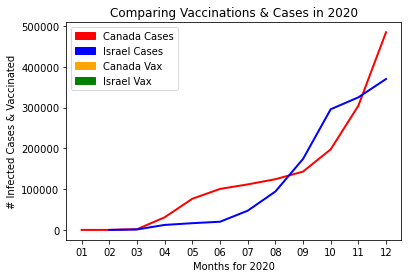

In [66]:
plt.plot(can_2020.index.get_level_values(1).tolist(), can_2020["total_cases"], color='red', linewidth=2)
plt.plot(isr_2020.index.get_level_values(1).tolist(), isr_2020["total_cases"], color='blue', linewidth=2)
plt.plot(isr_2020.index.get_level_values(1).tolist(), isr_2020["total_vaccinations"], color='green', linewidth=2)
plt.plot(can_2020.index.get_level_values(1).tolist(), can_2020["total_vaccinations"], color='orange', linewidth=2)

# show legend
canada_cases = mpatches.Patch(color='red', label='Canada Cases')
israel_cases = mpatches.Patch(color='blue', label='Israel Cases')
canada_vax = mpatches.Patch(color='orange', label='Canada Vax')
israel_vax = mpatches.Patch(color='green', label='Israel Vax')

plt.legend(handles=[canada_cases, israel_cases, canada_vax, israel_vax ])
plt.ylabel("# Infected Cases & Vaccinated")
plt.xlabel("Months for 2020")
plt.title("Comparing Vaccinations & Cases in 2020")

# show graph
plt.show()

Visualizing the correlation between Israel and Canada in terms of Cases in 2020

<h2>Visualizing a correlation between Israel and Canada 2021</h2>

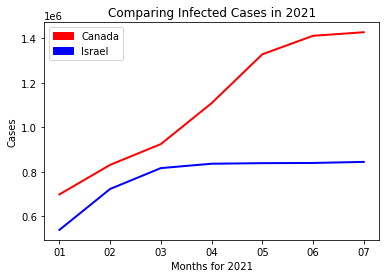

In [27]:
plt.plot(can_2021.index.get_level_values(1).tolist(), can_2021["total_cases"], color='red', linewidth=2)
plt.plot(isr_2021.index.get_level_values(1).tolist(), isr_2021["total_cases"], color='blue', linewidth=2)

# show legend
canada_line = mpatches.Patch(color='red', label='Canada')
israel_line = mpatches.Patch(color='blue', label='Israel')

plt.legend(handles=[canada_line, israel_line])
plt.ylabel("Cases")
plt.xlabel("Months for 2021")
plt.title("Comparing Infected Cases in 2021")

# show graph
plt.show()

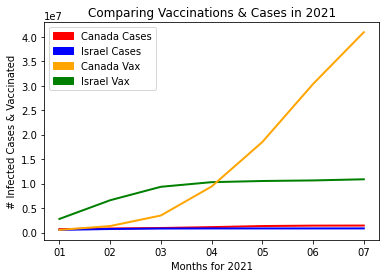

In [65]:
plt.plot(can_2021.index.get_level_values(1).tolist(), can_2021["total_cases"], color='red', linewidth=2)
plt.plot(isr_2021.index.get_level_values(1).tolist(), isr_2021["total_cases"], color='blue', linewidth=2)
plt.plot(isr_2021.index.get_level_values(1).tolist(), isr_2021["total_vaccinations"], color='green', linewidth=2)
plt.plot(can_2021.index.get_level_values(1).tolist(), can_2021["total_vaccinations"], color='orange', linewidth=2)

# show legend
canada_cases = mpatches.Patch(color='red', label='Canada Cases')
israel_cases = mpatches.Patch(color='blue', label='Israel Cases')
canada_vax = mpatches.Patch(color='orange', label='Canada Vax')
israel_vax = mpatches.Patch(color='green', label='Israel Vax')

plt.legend(handles=[canada_cases, israel_cases, canada_vax, israel_vax ])
plt.ylabel("# Infected Cases & Vaccinated")
plt.xlabel("Months for 2021")
plt.title("Comparing Vaccinations & Cases in 2021")

# show graph
plt.show()

</br>

<h3>Summarizing our findings</h3>

<p>
Based of our correlation findings, we can conclude that vaccines definitely did have a higher impact in reducing cases. Comparing Israel to Canada is the perfect example since Israel rolled out vaccines as soon as possible while Canada took a slower route. 
</p></br>

<p>
In our first visualization we can see that Israel was able to hit a plateau while Canada continued with their cases. In the second visualization we can see that the vaccine numbers are far less but that's mainly due to Israel slowing their cases down. 
</p>

</br>

<h2>Visualizing World Covid Dataset based on Continent</h2>
Comparing Europe to Asia to North America. Visualizing the data compared to each place. We might be able to see how the vaccinations differ, and how the cases evolved.

In [29]:
# filtering data based on specific location - Europe
eur_data = fd.loc[fd['continent']=='Europe']
# filtering data based on specific location - Asia
asia_data = fd.loc[fd['continent']=='Asia']
# filtering data based on specific location - North America
na_data = fd.loc[fd['continent']=='North America']

In [30]:
eur_data[["year","month", "day"]] = eur_data["date"].str.split("-", expand = True)
asia_data[["year","month", "day"]] = asia_data["date"].str.split("-", expand = True)
na_data[["year","month", "day"]] = na_data["date"].str.split("-", expand = True)

C:\Users\etufa\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [31]:
# europe 
eur = eur_data.groupby([(eur_data["year"]),(eur_data["month"])]).mean()
eur_2020 = eur.loc[eur.index.get_level_values(0) == '2020']
eur_2021 = eur.loc[eur.index.get_level_values(0) == '2021']

# asia 
asia = asia_data.groupby([(asia_data["year"]),(asia_data["month"])]).mean()
asia_2020 = asia.loc[asia.index.get_level_values(0) == '2020']
asia_2021 = asia.loc[asia.index.get_level_values(0) == '2021']

# north america
na = na_data.groupby([(na_data["year"]),(na_data["month"])]).mean()
na_2020 = na.loc[na.index.get_level_values(0) == '2020']
na_2021 = na.loc[na.index.get_level_values(0) == '2021']

In [32]:
asia.describe()

,total_cases,total_vaccinations,total_deaths,new_cases
count,1.900000e+01,8.000000e+00,19.000000,19.000000
mean,3.704508e+05,2.041909e+07,5949.476828,2222.435882
std,3.977212e+05,2.472672e+07,5435.874648,2268.410389
min,3.554630e+02,3.636435e+05,88.900000,78.966860
25%,2.657258e+04,2.493601e+06,828.808880,625.642027
50%,2.620672e+05,9.311664e+06,5259.077573,1933.671242
75%,5.386946e+05,3.092560e+07,9010.989705,2456.492645
max,1.213168e+06,6.719005e+07,17229.601824,8057.348662


In [33]:
asia_2020

total_cases  total_vaccinations  total_deaths    new_cases
year month                                                              
2020 01        355.462963                 NaN     88.900000    90.611650
     02       3283.273810                 NaN    346.318519   146.490079
     03       2977.799503                 NaN    264.834275    78.966860
     04       7552.568513                 NaN    350.221719   249.220845
     05      17016.196294                 NaN    606.846215   424.031572
     06      36128.966667                 NaN   1050.771545   827.252482
     07      69159.888813                 NaN   1860.117138  1366.722032
     08     121211.557310                 NaN   2862.940092  1933.671242
     09     190188.247518                 NaN   4032.826984  2521.118440
     10     262067.194235                 NaN   5259.077573  2090.578586
     11     323588.753191                 NaN   6380.807937  2182.029078
     12     406732.736445       363643.533333   7521.041379  2115.744505

In [34]:
asia_2021

total_cases  total_vaccinations  total_deaths    new_cases
year month                                                             
2021 01     4.674602e+05        1.584025e+06   8132.904937  1659.741935
     02     5.126545e+05        2.796793e+06   8786.892045  1450.533435
     03     5.647346e+05        5.574698e+06   9235.087365  2391.866850
     04     7.085685e+05        1.304863e+07  10151.554182  7815.017730
     05     9.872112e+05        2.545375e+07  12991.652174  8057.348662
     06     1.144505e+06        4.734116e+07  15887.663830  3230.469504
     07     1.213168e+06        6.719005e+07  17229.601824  3594.866261

array([<AxesSubplot:xlabel='year,month'>,
       <AxesSubplot:xlabel='year,month'>,
       <AxesSubplot:xlabel='year,month'>,
       <AxesSubplot:xlabel='year,month'>], dtype=object)

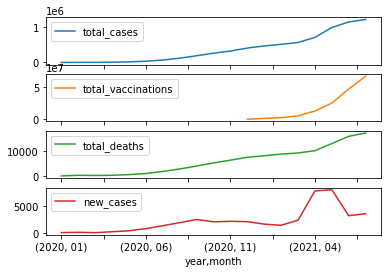

In [35]:
asia.plot(subplots=True)

In [36]:
eur.describe()

,total_cases,total_vaccinations,total_deaths,new_cases
count,1.900000e+01,8.000000e+00,18.000000,19.000000
mean,3.876193e+05,5.158947e+06,10594.664371,1938.974862
std,4.111209e+05,5.219695e+06,8838.955898,1801.505603
min,3.000000e+00,2.111535e+04,5.041667,0.894737
25%,4.227412e+04,1.031570e+06,4100.813996,386.210662
50%,1.529181e+05,3.433251e+06,6321.803357,1051.165217
75%,7.543692e+05,8.563676e+06,18693.287289,3524.968677
max,1.062901e+06,1.370952e+07,24722.585714,5349.239855


In [37]:
eur_2020

total_cases  total_vaccinations  total_deaths    new_cases
year month                                                              
2020 01          3.000000                 NaN           NaN     0.894737
     02         19.644013                 NaN      5.041667     4.818770
     03       3067.147281                 NaN    332.732456   350.253021
     04      20758.102899                 NaN   2006.406577   646.781884
     05      36782.369565                 NaN   3521.987097   422.168303
     06      47765.868116                 NaN   4031.860000   325.670290
     07      57225.903226                 NaN   4307.675986   324.171809
     08      70158.938990                 NaN   4522.730466   539.441094
     09      93610.579710                 NaN   4779.055556  1051.165217
     10     152918.052595                 NaN   5333.265233  3415.792426
     11     305063.021739                 NaN   7310.341481  5349.239855
     12     448220.481767        21115.352518  10535.066667  4532.201262

In [38]:
eur_2021

total_cases  total_vaccinations  total_deaths    new_cases
year month                                                             
2021 01     5.945926e+05        3.931771e+05  13885.677419  4593.074334
     02     7.057279e+05        1.244368e+06  17063.452381  3086.248447
     03     8.030106e+05        2.455725e+06  19236.565591  3868.442496
     04     9.259957e+05        4.410778e+06  21529.168148  3634.144928
     05     1.002807e+06        7.608903e+06  23336.701792  1665.173333
     06     1.034138e+06        1.142799e+07  24243.644444   994.683333
     07     1.062901e+06        1.370952e+07  24722.585714  2036.156832

array([<AxesSubplot:xlabel='year,month'>,
       <AxesSubplot:xlabel='year,month'>,
       <AxesSubplot:xlabel='year,month'>,
       <AxesSubplot:xlabel='year,month'>], dtype=object)

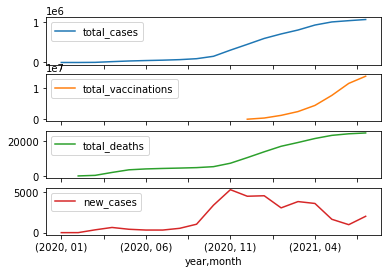

In [39]:
eur.plot(subplots=True)

In [40]:
na.describe()

,total_cases,total_vaccinations,total_deaths,new_cases
count,1.900000e+01,8.000000e+00,18.000000,19.000000
mean,7.162252e+05,1.508440e+07,21210.308456,3080.391113
std,6.848936e+05,1.011586e+07,15119.778085,2933.400590
min,3.312500e+00,3.141942e+05,1.000000,0.616667
25%,8.986340e+04,7.698159e+06,8844.657975,1303.586489
50%,4.237856e+05,1.597955e+07,19163.113248,2178.813043
75%,1.430125e+06,2.298432e+07,36336.840849,3353.928986
max,1.736678e+06,2.803665e+07,41608.111801,10002.744741


In [41]:
na_2020

total_cases  total_vaccinations  total_deaths     new_cases
year month                                                               
2020 01          3.312500                 NaN           NaN      0.733333
     02         10.683333                 NaN      1.000000      0.616667
     03       2792.939535                 NaN    154.140449    477.376744
     04      31064.739130                 NaN   2229.105973   1402.710145
     05      70784.262272                 NaN   5736.464158   1204.462833
     06     108942.537681                 NaN   8255.233333   1547.901449
     07     183943.187938                 NaN  10612.931900   3207.830295
     08     276518.133240                 NaN  13557.544803   2502.957924
     09     345144.985507                 NaN  16035.494444   2178.813043
     10     423785.612903                 NaN  18235.354839   3238.652174
     11     580690.089855                 NaN  20090.871658   7181.456522
     12     854959.768583       314194.225806  24205.792869  10002.744741

In [42]:
na_2021

total_cases  total_vaccinations  total_deaths    new_cases
year month                                                             
2021 01     1.173428e+06        3.926379e+06  28381.659843  9828.546985
     02     1.379665e+06        8.955419e+06  33640.897959  4425.798137
     03     1.480585e+06        1.350595e+07  37235.488479  3099.774194
     04     1.583165e+06        1.845316e+07  39467.307937  3469.205797
     05     1.666772e+06        2.222690e+07  41136.414747  1917.681627
     06     1.709346e+06        2.525658e+07  41608.111801  1128.379710
     07     1.736678e+06        2.803665e+07  41201.737013  1711.788820

array([<AxesSubplot:xlabel='year,month'>,
       <AxesSubplot:xlabel='year,month'>,
       <AxesSubplot:xlabel='year,month'>,
       <AxesSubplot:xlabel='year,month'>], dtype=object)

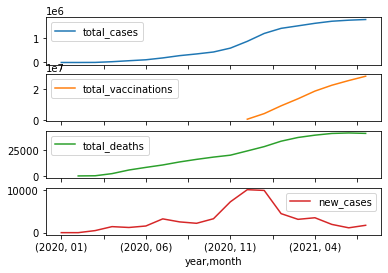

In [43]:
na.plot(subplots=True)

<AxesSubplot:xlabel='year,month'>

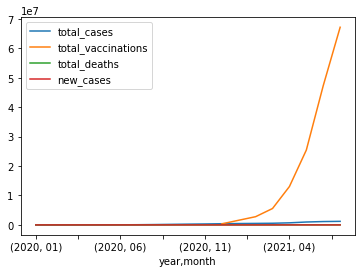

In [44]:
asia.plot()

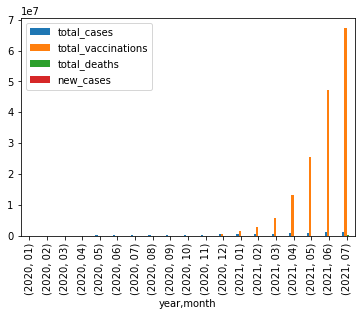

In [45]:
asia.plot(kind="bar")
plt.show()

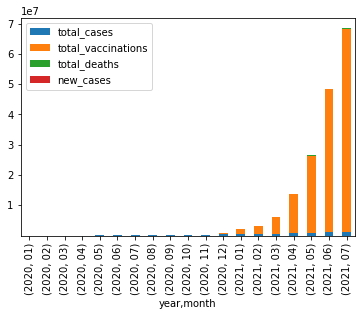

In [46]:
asia.plot(kind='bar', stacked=True)
plt.show()

<AxesSubplot:xlabel='year,month'>

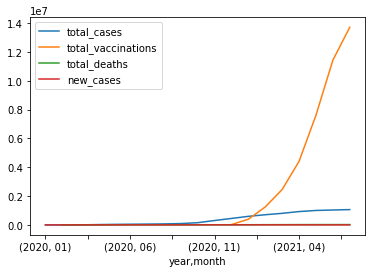

In [47]:
eur.plot()

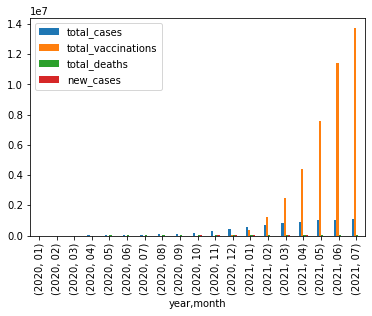

In [48]:
eur.plot(kind="bar")
plt.show()

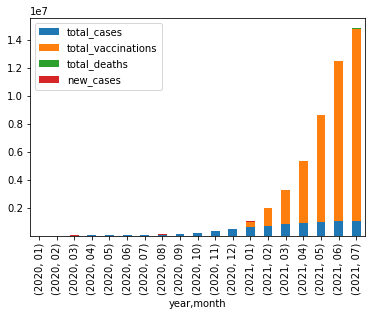

In [49]:
eur.plot(kind='bar', stacked=True)
plt.show()

<AxesSubplot:xlabel='year,month'>

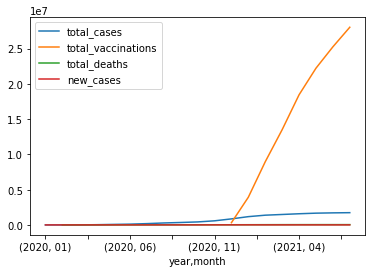

In [50]:
na.plot()

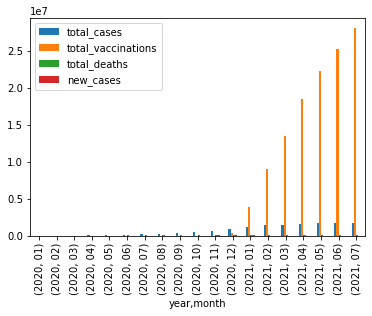

In [51]:
na.plot(kind="bar")
plt.show()

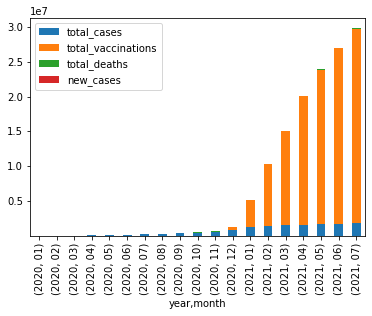

In [52]:
na.plot(kind='bar', stacked=True)
plt.show()

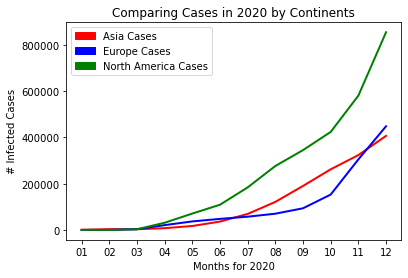

In [53]:
plt.plot(asia_2020.index.get_level_values(1).tolist(), asia_2020["total_cases"], color='red', linewidth=2)
plt.plot(eur_2020.index.get_level_values(1).tolist(), eur_2020["total_cases"], color='blue', linewidth=2)
plt.plot(na_2020.index.get_level_values(1).tolist(), na_2020["total_cases"], color='green', linewidth=2)


# show legend
asia_cases = mpatches.Patch(color='red', label='Asia Cases')
eur_cases = mpatches.Patch(color='blue', label='Europe Cases')
na_cases = mpatches.Patch(color='green', label='North America Cases')


plt.legend(handles=[asia_cases, eur_cases, na_cases])
plt.ylabel("# Infected Cases")
plt.xlabel("Months for 2020")
plt.title("Comparing Cases in 2020 by Continents")

# show graph
plt.show()

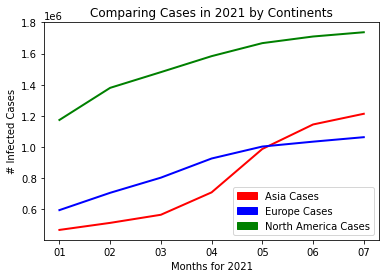

In [54]:
# Europe 
#eur_2020.plot.scatter(x=eur_2020.index.get_level_values(1).tolist(), y=eur_2020["total_cases"], title='Europe - Total Cases')

plt.plot(asia_2021.index.get_level_values(1).tolist(), asia_2021["total_cases"], color='red', linewidth=2)
plt.plot(eur_2021.index.get_level_values(1).tolist(), eur_2021["total_cases"], color='blue', linewidth=2)
plt.plot(na_2021.index.get_level_values(1).tolist(), na_2021["total_cases"], color='green', linewidth=2)


# show legend
asia_cases = mpatches.Patch(color='red', label='Asia Cases')
eur_cases = mpatches.Patch(color='blue', label='Europe Cases')
na_cases = mpatches.Patch(color='green', label='North America Cases')


plt.legend(handles=[asia_cases, eur_cases, na_cases])
plt.ylabel("# Infected Cases")
plt.xlabel("Months for 2021")
plt.title("Comparing Cases in 2021 by Continents")

# show graph
plt.show()

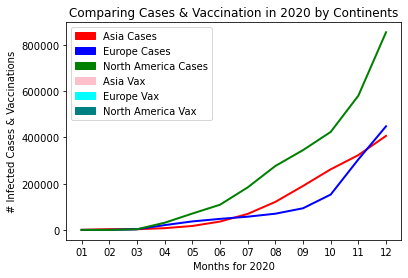

In [55]:
plt.plot(asia_2020.index.get_level_values(1).tolist(), asia_2020["total_cases"], color='red', linewidth=2)
plt.plot(eur_2020.index.get_level_values(1).tolist(), eur_2020["total_cases"], color='blue', linewidth=2)
plt.plot(na_2020.index.get_level_values(1).tolist(), na_2020["total_cases"], color='green', linewidth=2)

plt.plot(asia_2020.index.get_level_values(1).tolist(), asia_2020["total_vaccinations"], color='pink', linewidth=2)
plt.plot(eur_2020.index.get_level_values(1).tolist(), eur_2020["total_vaccinations"], color='aqua', linewidth=2)
plt.plot(na_2020.index.get_level_values(1).tolist(), na_2020["total_vaccinations"], color='teal', linewidth=2)


# show legend
asia_cases = mpatches.Patch(color='red', label='Asia Cases')
eur_cases = mpatches.Patch(color='blue', label='Europe Cases')
na_cases = mpatches.Patch(color='green', label='North America Cases')

asia_vax = mpatches.Patch(color='pink', label='Asia Vax')
eur_vax = mpatches.Patch(color='aqua', label='Europe Vax')
na_vax = mpatches.Patch(color='teal', label='North America Vax')


plt.legend(handles=[asia_cases, eur_cases, na_cases, asia_vax, eur_vax, na_vax])
plt.ylabel("# Infected Cases & Vaccinations")
plt.xlabel("Months for 2020")
plt.title("Comparing Cases & Vaccination in 2020 by Continents")

# show graph
plt.show()

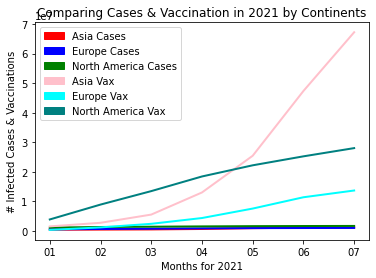

In [56]:
plt.plot(asia_2021.index.get_level_values(1).tolist(), asia_2021["total_cases"], color='red', linewidth=2)
plt.plot(eur_2021.index.get_level_values(1).tolist(), eur_2021["total_cases"], color='blue', linewidth=2)
plt.plot(na_2021.index.get_level_values(1).tolist(), na_2021["total_cases"], color='green', linewidth=2)

plt.plot(asia_2021.index.get_level_values(1).tolist(), asia_2021["total_vaccinations"], color='pink', linewidth=2)
plt.plot(eur_2021.index.get_level_values(1).tolist(), eur_2021["total_vaccinations"], color='aqua', linewidth=2)
plt.plot(na_2021.index.get_level_values(1).tolist(), na_2021["total_vaccinations"], color='teal', linewidth=2)


# show legend
asia_cases = mpatches.Patch(color='red', label='Asia Cases')
eur_cases = mpatches.Patch(color='blue', label='Europe Cases')
na_cases = mpatches.Patch(color='green', label='North America Cases')

asia_vax = mpatches.Patch(color='pink', label='Asia Vax')
eur_vax = mpatches.Patch(color='aqua', label='Europe Vax')
na_vax = mpatches.Patch(color='teal', label='North America Vax')


plt.legend(handles=[asia_cases, eur_cases, na_cases, asia_vax, eur_vax, na_vax])
plt.ylabel("# Infected Cases & Vaccinations")
plt.xlabel("Months for 2021")
plt.title("Comparing Cases & Vaccination in 2021 by Continents")

# show graph
plt.show()

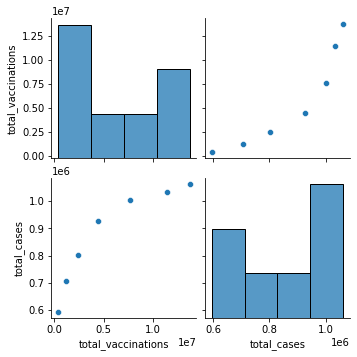

In [57]:
import seaborn as sns
sns.pairplot(eur_2021,vars=['total_vaccinations', 'total_cases'])

<AxesSubplot:>

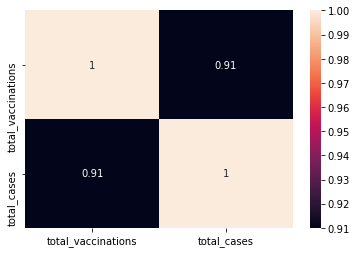

In [70]:
#Heatmap
cor_mat = eur_2021[['total_vaccinations', 'total_cases',]].corr().round(2)
sns.heatmap(data= cor_mat, annot=True)

<h2>Visualizing World Covid Dataset based Total Death by Continent</h2>

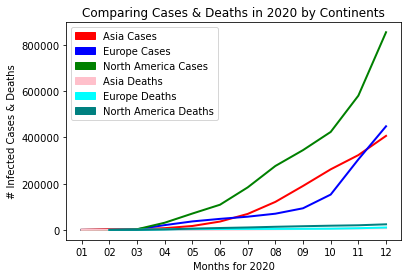

In [59]:
plt.plot(asia_2020.index.get_level_values(1).tolist(), asia_2020["total_cases"], color='red', linewidth=2)
plt.plot(eur_2020.index.get_level_values(1).tolist(), eur_2020["total_cases"], color='blue', linewidth=2)
plt.plot(na_2020.index.get_level_values(1).tolist(), na_2020["total_cases"], color='green', linewidth=2)

plt.plot(asia_2020.index.get_level_values(1).tolist(), asia_2020["total_deaths"], color='pink', linewidth=2)
plt.plot(eur_2020.index.get_level_values(1).tolist(), eur_2020["total_deaths"], color='aqua', linewidth=2)
plt.plot(na_2020.index.get_level_values(1).tolist(), na_2020["total_deaths"], color='teal', linewidth=2)


# show legend
asia_cases = mpatches.Patch(color='red', label='Asia Cases')
eur_cases = mpatches.Patch(color='blue', label='Europe Cases')
na_cases = mpatches.Patch(color='green', label='North America Cases')

asia_deaths = mpatches.Patch(color='pink', label='Asia Deaths')
eur_deaths = mpatches.Patch(color='aqua', label='Europe Deaths')
na_deaths = mpatches.Patch(color='teal', label='North America Deaths')


plt.legend(handles=[asia_cases, eur_cases, na_cases, asia_deaths, eur_deaths, na_deaths])
plt.ylabel("# Infected Cases & Deaths")
plt.xlabel("Months for 2020")
plt.title("Comparing Cases & Deaths in 2020 by Continents")

# show graph
plt.show()

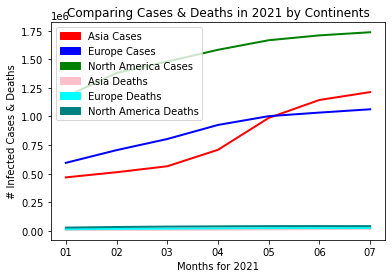

In [60]:
plt.plot(asia_2021.index.get_level_values(1).tolist(), asia_2021["total_cases"], color='red', linewidth=2)
plt.plot(eur_2021.index.get_level_values(1).tolist(), eur_2021["total_cases"], color='blue', linewidth=2)
plt.plot(na_2021.index.get_level_values(1).tolist(), na_2021["total_cases"], color='green', linewidth=2)

plt.plot(asia_2021.index.get_level_values(1).tolist(), asia_2021["total_deaths"], color='pink', linewidth=2)
plt.plot(eur_2021.index.get_level_values(1).tolist(), eur_2021["total_deaths"], color='aqua', linewidth=2)
plt.plot(na_2021.index.get_level_values(1).tolist(), na_2021["total_deaths"], color='teal', linewidth=2)


# show legend
asia_cases = mpatches.Patch(color='red', label='Asia Cases')
eur_cases = mpatches.Patch(color='blue', label='Europe Cases')
na_cases = mpatches.Patch(color='green', label='North America Cases')

asia_deaths = mpatches.Patch(color='pink', label='Asia Deaths')
eur_deaths = mpatches.Patch(color='aqua', label='Europe Deaths')
na_deaths = mpatches.Patch(color='teal', label='North America Deaths')


plt.legend(handles=[asia_cases, eur_cases, na_cases, asia_deaths, eur_deaths, na_deaths])
plt.ylabel("# Infected Cases & Deaths")
plt.xlabel("Months for 2021")
plt.title("Comparing Cases & Deaths in 2021 by Continents")

# show graph
plt.show()

</br>

<h2>Total Vaccinations in relation to New Cases/Deaths in 2021</h2>

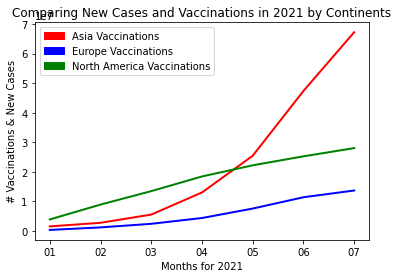

In [73]:
plt.plot(asia_2021.index.get_level_values(1).tolist(), asia_2021["total_vaccinations"], color='red', linewidth=2)
plt.plot(eur_2021.index.get_level_values(1).tolist(), eur_2021["total_vaccinations"], color='blue', linewidth=2)
plt.plot(na_2021.index.get_level_values(1).tolist(), na_2021["total_vaccinations"], color='green', linewidth=2)


# show legend
asia_cases = mpatches.Patch(color='red', label='Asia Vaccinations')
eur_cases = mpatches.Patch(color='blue', label='Europe Vaccinations')
na_cases = mpatches.Patch(color='green', label='North America Vaccinations')

plt.legend(handles=[asia_cases, eur_cases, na_cases])
plt.ylabel("# Vaccinations & New Cases")
plt.xlabel("Months for 2021")
plt.title("Comparing New Cases and Vaccinations in 2021 by Continents")

# show graph
plt.show()

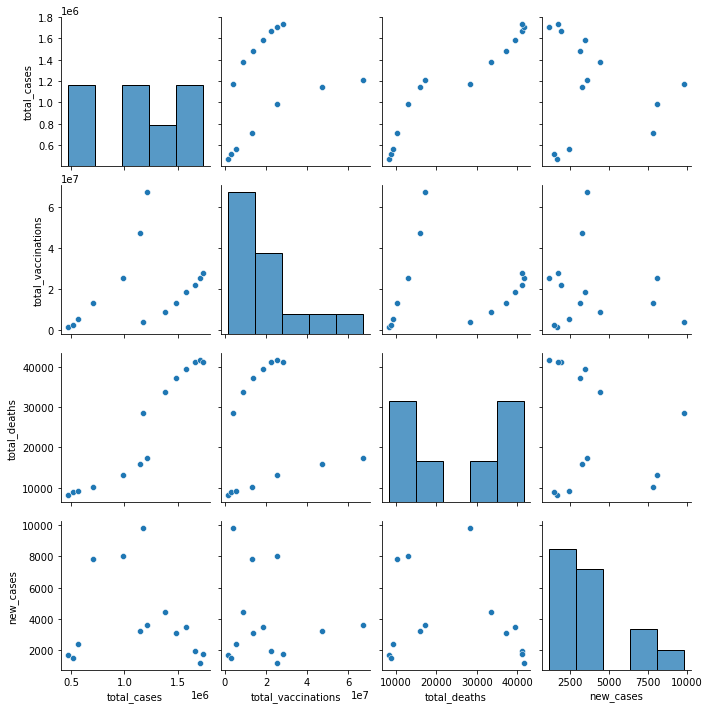

In [62]:
ad1 = asia_2021.append(eur_2021)
ad2 = asia_2021.append(na_2021)
sns.pairplot(ad2)

Text(0.5, 1.0, 'Comparing New Cases and Vaccinations in 2021 by Continents')

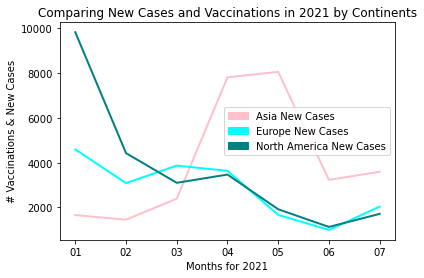

In [63]:
plt.plot(asia_2021.index.get_level_values(1).tolist(), asia_2021["new_cases"], color='pink', linewidth=2)
plt.plot(eur_2021.index.get_level_values(1).tolist(), eur_2021["new_cases"], color='aqua', linewidth=2)
plt.plot(na_2021.index.get_level_values(1).tolist(), na_2021["new_cases"], color='teal', linewidth=2)

asia_ncases = mpatches.Patch(color='pink', label='Asia New Cases')
eur_ncases = mpatches.Patch(color='aqua', label='Europe New Cases')
na_ncases = mpatches.Patch(color='teal', label='North America New Cases')

plt.legend(handles=[asia_ncases, eur_ncases, na_ncases])
plt.ylabel("# Vaccinations & New Cases")
plt.xlabel("Months for 2021")
plt.title("Comparing New Cases and Vaccinations in 2021 by Continents")

</br>

<h2>Total New Cases/Deaths in 2020</h2>

Text(0.5, 1.0, 'Total Cases per Month in 2020 by Continents')

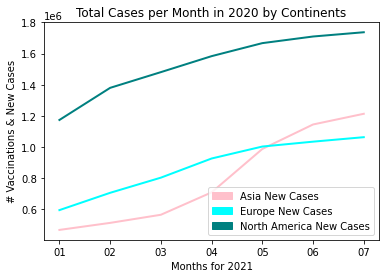

In [64]:
plt.plot(asia_2021.index.get_level_values(1).tolist(), asia_2021["total_cases"], color='pink', linewidth=2)
plt.plot(eur_2021.index.get_level_values(1).tolist(), eur_2021["total_cases"], color='aqua', linewidth=2)
plt.plot(na_2021.index.get_level_values(1).tolist(), na_2021["total_cases"], color='teal', linewidth=2)

asia_cases = mpatches.Patch(color='pink', label='Asia New Cases')
eur_cases = mpatches.Patch(color='aqua', label='Europe New Cases')
na_cases = mpatches.Patch(color='teal', label='North America New Cases')

plt.legend(handles=[asia_cases, eur_cases, na_cases])
plt.ylabel("# Vaccinations & New Cases")
plt.xlabel("Months for 2021")
plt.title("Total Cases per Month in 2020 by Continents")